**Contrasting signatures of genomic divergence in rapidly speciating crater lake cichlid fishes**

Andreas Kautt , Claudius Kratochwil , Alexander Nater , Gonzalo Machado-Schiaffino , Melisa Olave , Frederico Henning , Julian Torres-Dowdall , Andreas Härer , Darrin Hulsey , Paolo Franchini , Martin Pippel , Eugene Myers, Axel Meyer

R-Script for partial least square (PLS) regression analyses <br>
Code written between 2018 and 2020 by Andi Kautt

Disclaimer: Although we did our best to ensure that this code is correct, we provide it without warranty of any kind. Please contact us if you have questions and report any problems.

# Set up environment

This will read in the provided "sample_list.csv" (on Dryad) file and run:
- between-group PCAs in CLs Apoyo and Xiloá (the two multi-species lakes) to identify primary axes of genomic divergence
- partial least squares regressions for each lake between primary axes of genomic divergence and focal traits

## Load libraries

In [1]:
library(tidyverse)
library(gdata)
library(plsdepot)
library(gridExtra)
library(plotly)
library(cowplot)
library(plotly)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following objects are masked from ‘package:dplyr’:

    combine, first, last

The following object is masked from ‘package:purrr’:

    keep

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘gridExtra’

The following object is masked from ‘package:gdata’:

    combine

The foll

In [2]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS/LAPACK: /Users/andreaskautt/anaconda3/envs/geomorph/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] Rtsne_0.15      cowplot_1.0.0   plotly_4.8.0    gridExtra_2.3  
 [5] plsdepot_0.1.17 gdata_2.18.0    forcats_0.4.0   stringr_1.4.0  
 [9] dplyr_0.8.1     purrr_0.3.2     readr_1.3.1     tidyr_0.8.3    
[13] tibble_2.1.3    ggplot2_3.1.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3      gtools_3.8.1      tidyselect_0.2.5  repr_0.15.0      
 [5] haven_2.1.0       lattice_0.20-38   colorspace_1.4-1  generics_0.0.2   
 [9] viridisLite_0.3.0 htmltools_0.4.0   base64enc_0.1-3   rlang_0.4.6      
[13] pillar_1.4.1      glue_1.4.0        withr_2.2.0 

In [2]:
# set your path that contains input file here
setwd("/Users/andreaskautt/Work/Projects/2018_MoM/Data/PLS_regression")

## Load data

In [3]:
# read in data
MoM.master <- read.csv("sample_list.csv", header=T, sep=",", stringsAsFactors=T)

In [4]:
colnames(MoM.master)

[1] "Sample_name"                   "Group_short"                  
 [3] "Species"                       "Lake"                         
 [5] "Color_species"                 "Color_lake"                   
 [7] "Sampling_Year"                 "Properly_Paired_Reads"        
 [9] "Coverage"                      "Coloration_binary"            
[11] "Lip_size_binary"               "Lip_size_log10"               
[13] "Jaws_Max_Tooth_Size_Residuals" "tSNE_X"                       
[15] "tSNE_Y"                        "PC1_All"                      
[17] "PC2_All"                       "PC3_All"                      
[19] "PC1_Lake_Specific"             "PC2_Lake_Specific"            
[21] "PC3_Lake_Specific"             "PC4_Lake_Specific"            
[23] "PC5_Lake_Specific"             "Morpho_PC1"                   
[25] "Morpho_PC2"                    "Morpho_PC3"                   
[27] "Morhpo_LD1_Lake_Specific"      "Morhpo_LD2_Lake_Specific"     
[29] "Morhpo_LD3_Lake_Specific"      "Morhpo_LD4_Lake_Specific"     
[31] "Morhpo_LD5_Lake_Specific"

In [5]:
# reformat a few things
MoM.master <- MoM.master %>% separate(Group_short,into=c("Lake","group"), remove=F) %>% select(-group,-Species) %>% 
    rename("Species"=Group_short) %>% mutate(Coloration_binary=as.numeric(Coloration_binary)) %>%
    mutate(Sample_name=as.character(Sample_name), Color_lake=as.character(Color_lake),Color_species=as.character(Color_species))

In [6]:
# pull out relevant columns and rename them for convenience
MoM <- MoM.master %>% select(Sample_name,Species,Lake,"GoldDark"=Coloration_binary,"Lips"=Lip_size_log10,
                        "Teeth"=Jaws_Max_Tooth_Size_Residuals,Morpho_PC1,Morpho_PC2,Morpho_PC3,
                        "GenPC1"=PC1_Lake_Specific,"GenPC2"=PC2_Lake_Specific,"GenPC3"=PC3_Lake_Specific,
                        "GenPC4"=PC4_Lake_Specific,"GenPC5"=PC5_Lake_Specific)
colnames(MoM)

[1] "Sample_name" "Species"     "Lake"        "GoldDark"    "Lips"       
 [6] "Teeth"       "Morpho_PC1"  "Morpho_PC2"  "Morpho_PC3"  "GenPC1"     
[11] "GenPC2"      "GenPC3"      "GenPC4"      "GenPC5"

# between-group PCAs

-> project individual genetic PC scores onto primary axes of divergence in CLs Apoyo and Xiloá, where standard PC axes do not necessarily separate particular species from all other sympatric ones

In [7]:
Lakes=c("Apo","Xil")
bgPCA.plots <- list()
run <- 0

for(focal.lake in Lakes){

    GenPCs <- paste0("GenPC",seq(1,5))
    
    if (focal.lake=="Apo") {GenPCs  <- GenPCs
            Species=c("Apo_ast","Apo_cha","Apo_fla","Apo_glo","Apo_sup","Apo_zal")
            proj.genPCs.Apo <- list()}
    if (focal.lake=="Xil") {GenPCs  <- GenPCs[1:3]               
            Species=c("Xil_ama","Xil_vir","Xil_sag","Xil_xil")
            proj.genPCs.Xil <- list()}
    
    for(focal.species in Species){
        
        run <- run+1
    
        MoM.dat <- MoM.master %>% filter(Lake==focal.lake) %>%
            select(Sample_name,Species,"GenPC1"=PC1_Lake_Specific,"GenPC2"=PC2_Lake_Specific,"GenPC3"=PC3_Lake_Specific,
                                "GenPC4"=PC4_Lake_Specific,"GenPC5"=PC5_Lake_Specific) %>%
            select(Sample_name,Species,one_of(GenPCs)) %>%
            filter(!str_detect(Species,"_xxx"))
        
        MoM.mean.dat <- MoM.dat %>% select(-Sample_name) %>%
            mutate(Species=if_else(Species==focal.species, as.character(Species), "other")) %>%
            group_by(Species) %>% summarize_all(list(mean=mean)) %>% column_to_rownames("Species")
        MoM.mean.dat
        
        
        # run between-group PCA
        MoM.bgPCA <- MoM.mean.dat %>% prcomp()
        summary(MoM.bgPCA)
        
        # project data onto between-group PCA axes
        MoM.proj <- (MoM.dat %>% select(-Species) %>% column_to_rownames("Sample_name") %>% as.matrix()) %*% MoM.bgPCA$rotation
        MoM.proj.mean <- (MoM.mean.dat %>% as.matrix()) %*% MoM.bgPCA$rotation
        
        # plot projected data and group means
        bgPCA.plots[[run]] <- MoM.proj.mean %>% as.data.frame() %>% rownames_to_column("group") %>% 
            ggplot( aes(x=PC1, y=PC2, color=group)) + 
            geom_point(size=4) + 
            geom_text(aes(x=PC1, y=PC2), label=rownames(MoM.proj.mean), vjust=2) +
            scale_color_manual(values=c("black","black")) +
            geom_point(data=as.data.frame(MoM.proj), aes(x=PC1, y=PC2), size=2, color='gray') +
            theme_classic() + theme(legend.position="none") +
            labs(title=focal.species, y=("between-group PC2"), x=("between-group PC1")) +
            theme(plot.title=element_text(color=MoM.master$Color_species[MoM.master$Species==focal.species][1], 
                                          size=14, face="bold", hjust=0.5)) +
            theme(axis.text=element_text(size=8), axis.title=element_text(size=12)) 

        
        # save projected PC1 scores     
        if(focal.lake=="Apo"){
        proj.genPCs.Apo[focal.species] <- MoM.proj %>% as.data.frame() %>% select(!!focal.species := PC1)}
        if(focal.lake=="Xil"){
        proj.genPCs.Xil[focal.species] <- MoM.proj %>% as.data.frame() %>% select(!!focal.species := PC1)}
        
    }
    
    if(focal.lake=="Apo"){proj.genPCs.Apo <- proj.genPCs.Apo %>% as.data.frame() %>% cbind(Sample_name=MoM.dat$Sample_name) %>%
                         mutate(Sample_name=as.character(Sample_name))}
    if(focal.lake=="Xil"){proj.genPCs.Xil <- proj.genPCs.Xil %>% as.data.frame() %>% cbind(Sample_name=MoM.dat$Sample_name) %>%
                         mutate(Sample_name=as.character(Sample_name))}
}

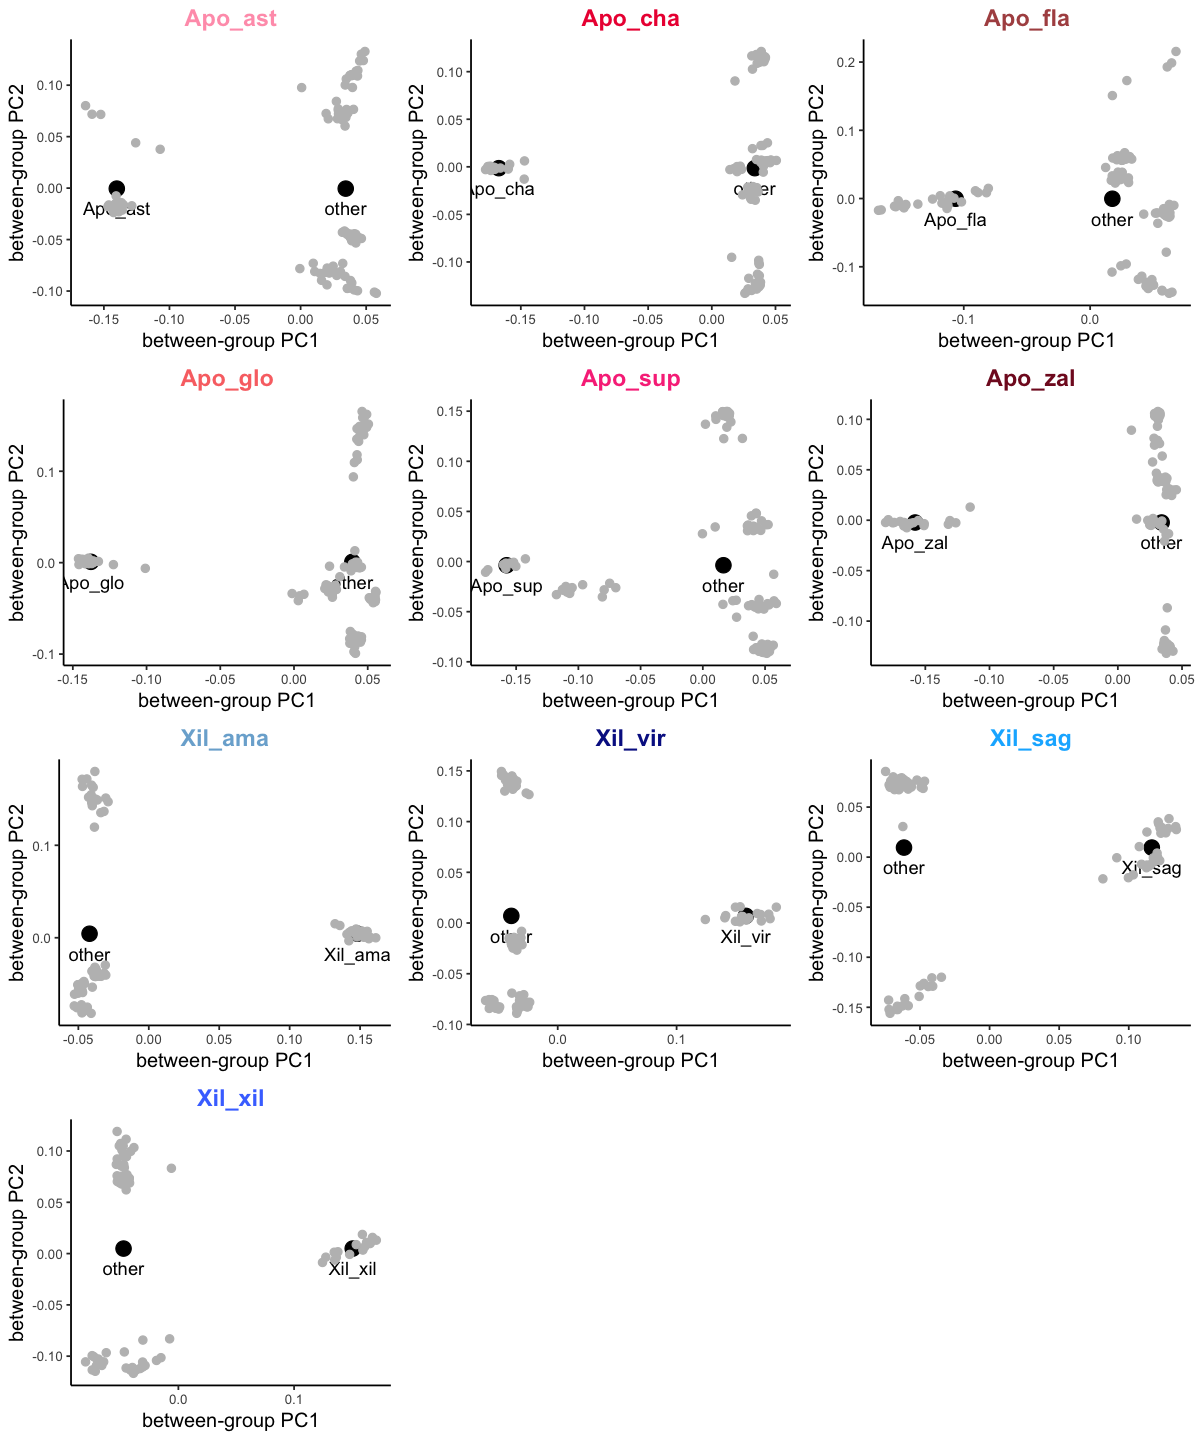

In [8]:
# plot first tow axes of bgPCAs
options(repr.plot.height=12, repr.plot.width=10)

grid.arrange(grobs=c(bgPCA.plots), ncol=3)

# PLS regressions

## Use plsreg2 and cross-validation to determine best number of latent variables

In [10]:
set.seed(123)

comp.num=list()

for (focal.lake in c("Man","Nic","Apo","Xil","Mas","Aye","AsL","AsM","Tsc")) {
 
    Traits <- c('GoldDark','Lips','Teeth','Morpho_PC1','Morpho_PC2','Morpho_PC3') 
    GenPCs <- paste0("GenPC",seq(1,5))
    
    # Set lake-specific settings
    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")){GenPCs  <- GenPCs[1:2]; method=plsreg2}
    if (focal.lake %in% c("AsL","AsM","Tsc")){Traits <- Traits[Traits!="Teeth"]}
    if (focal.lake %in% c("AsL","Tsc")){Traits <- Traits[Traits!="GoldDark"]}
    if (focal.lake=="Apo") {GenPCs  <- GenPCs; Traits <- Traits[Traits!="GoldDark"]; method=plsreg2
                           Species=c("Apo_ast","Apo_cha","Apo_fla","Apo_glo","Apo_sup","Apo_zal")}
    if (focal.lake=="Xil") {GenPCs  <- GenPCs[1:3]; method=plsreg2
                           Species=c("Xil_ama","Xil_vir","Xil_sag","Xil_xil")}
        
    # Prep data
    MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% na.omit() 
    if (focal.lake %in% c("AsL","AsM","Tsc")){
        MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% mutate(Teeth=0) %>% na.omit()}
    
    # Use between-group PCA scores for Apo and Xil
    if (focal.lake=="Apo") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Apo, by="Sample_name")}
    if (focal.lake=="Xil") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Xil, by="Sample_name")}
    
    pheno.pls <- MoM.pls %>% select(., one_of(Traits))
    #geno.pls <- MoM.pls %>% select(., one_of(GenPCs))

    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")) {geno.pls <- MoM.pls %>% select(., one_of(GenPCs))}
    if (focal.lake %in% c("Apo","Xil")) {geno.pls <- MoM.pls %>% select(., one_of(Species))} 
    
    # if crossvalidation "comp=NULL" fails, throw ERROR
    tryCatch({
    pls <- method(pheno.pls, geno.pls, comps=NULL, crosval=T)
    cat("\nNumber of latent variables determined by cross-validation for: ",focal.lake, "=", ncol(pls$VIP))
    comp.num[[focal.lake]] <- ncol(pls$VIP)},
    error=function(e){cat("\nERROR in", focal.lake, conditionMessage(e))})    

}

# assign 2 to all empty entries
for (focal.lake in c("Man","Nic","Apo","Xil","Mas","Aye","AsL","AsM","Tsc")) {
    if (is.null(comp.num[[focal.lake]])) {comp.num[[focal.lake]] <- 2}}

comp.num %>% as.data.frame()


Number of latent variables determined by cross-validation for:  Man = 2
Number of latent variables determined by cross-validation for:  Nic = 2
Number of latent variables determined by cross-validation for:  Apo = 4
Number of latent variables determined by cross-validation for:  Xil = 3
Number of latent variables determined by cross-validation for:  Mas = 3
ERROR in Aye incorrect number of dimensions
ERROR in AsL incorrect number of dimensions
Number of latent variables determined by cross-validation for:  AsM = 2
Number of latent variables determined by cross-validation for:  Tsc = 2

Man,Nic,Apo,Xil,Mas,AsM,Tsc,Aye,AsL
2,2,4,3,3,2,2,2,2


### Run plsreg and plot corrplots

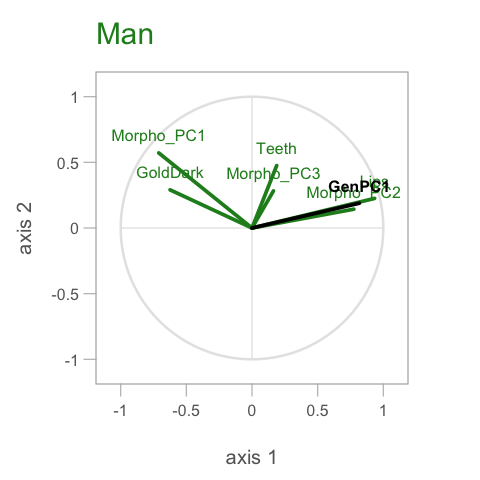

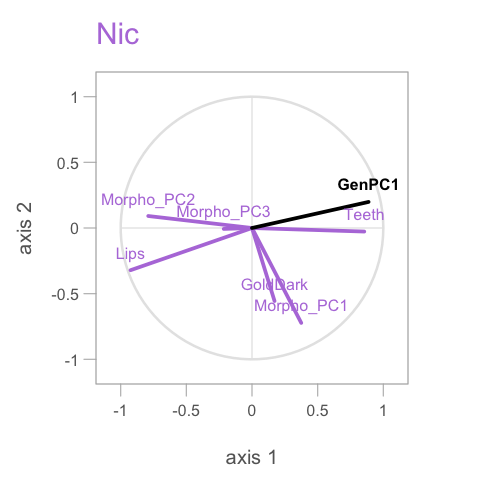

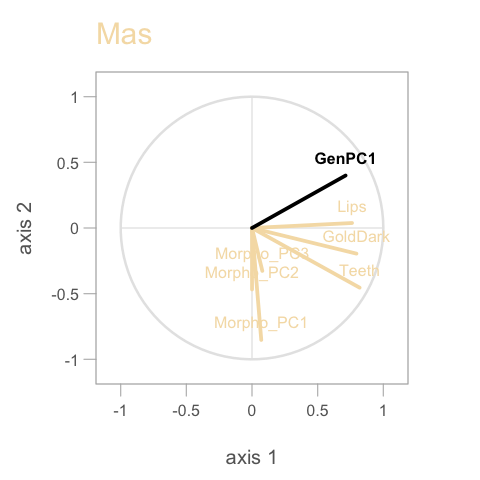

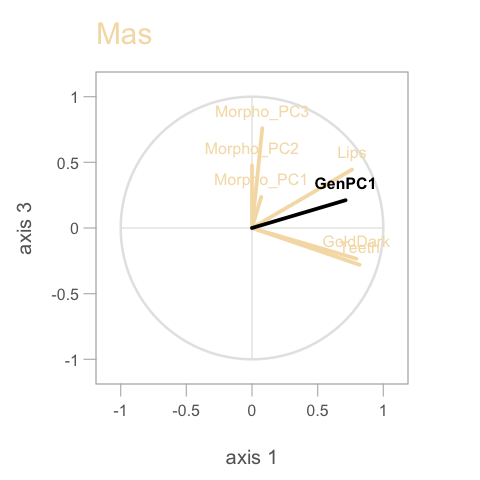

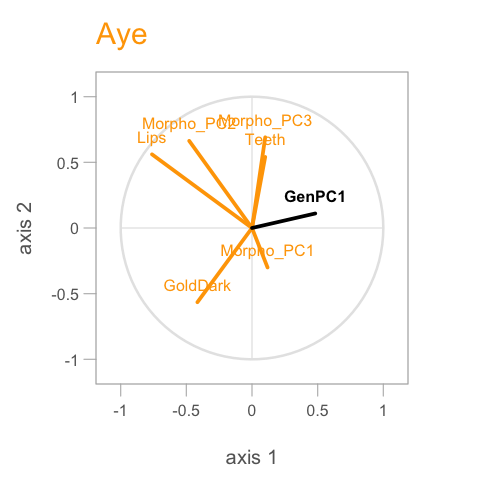

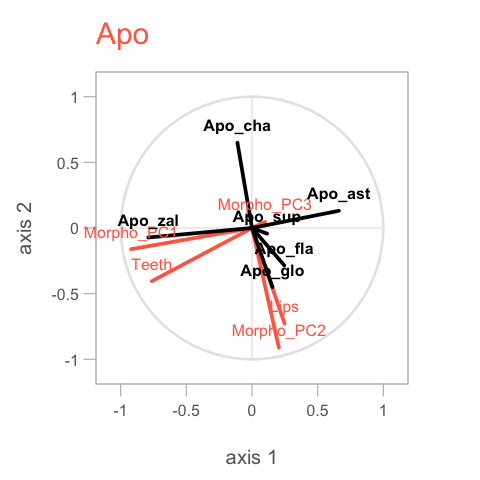

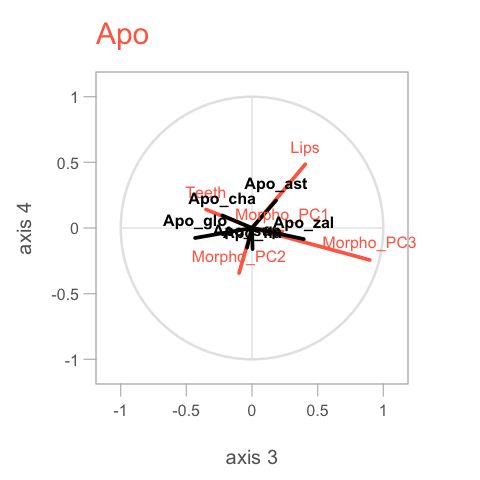

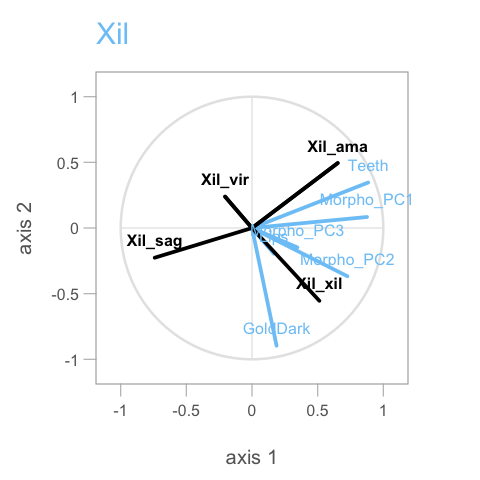

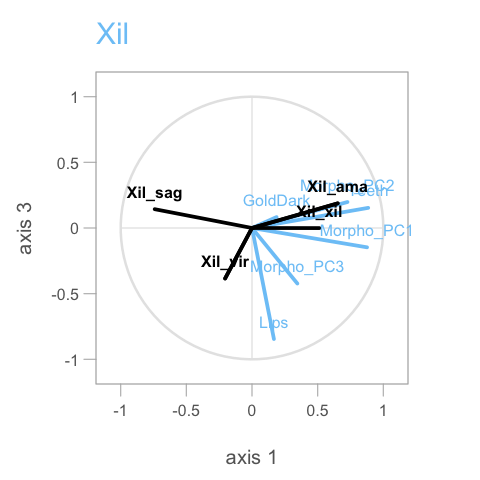

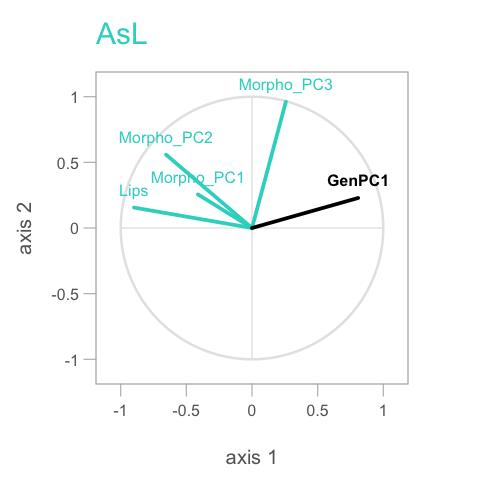

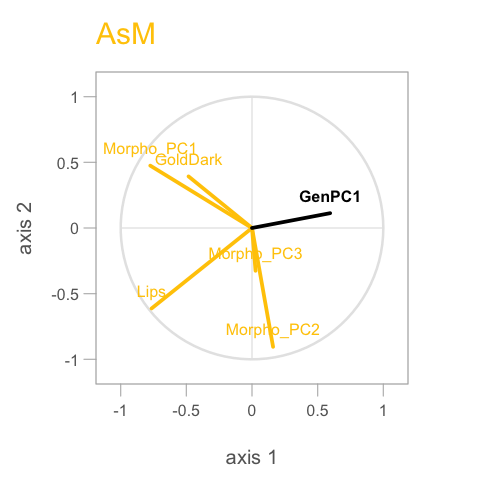

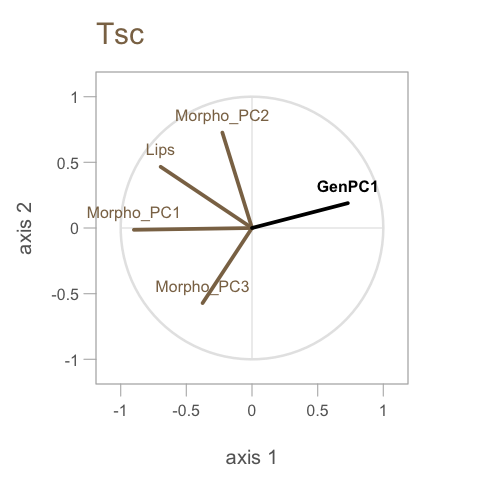

In [11]:
options(repr.plot.height=4,repr.plot.width=4)

for (focal.lake in c("Man","Nic","Mas","Aye","Apo","Xil","AsL","AsM","Tsc")) {
 
    Traits <- c('GoldDark','Lips','Teeth','Morpho_PC1','Morpho_PC2','Morpho_PC3') 
    GenPCs <- paste0("GenPC",seq(1,5))
    
    # set lake-specific settings
    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")){GenPCs  <- GenPCs[1]; method=plsreg1}
    if (focal.lake %in% c("AsL","AsM","Tsc")){Traits <- Traits[Traits!="Teeth"]}
    if (focal.lake %in% c("AsL","Tsc")){Traits <- Traits[Traits!="GoldDark"]}
    if (focal.lake=="Apo") {GenPCs  <- GenPCs; Traits <- Traits[Traits!="GoldDark"]; method=plsreg2
                           Species=c("Apo_ast","Apo_cha","Apo_fla","Apo_glo","Apo_sup","Apo_zal")}
    if (focal.lake=="Xil") {GenPCs  <- GenPCs[1:3]; method=plsreg2
                           Species=c("Xil_ama","Xil_vir","Xil_sag","Xil_xil")}
        
    # prep data
    MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% na.omit() 
    if (focal.lake %in% c("AsL","AsM","Tsc")){
        MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% mutate(Teeth=0) %>% na.omit()}


    # use between-group PCA scores for Apo and Xil
    if (focal.lake=="Apo") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Apo, by="Sample_name")}
    if (focal.lake=="Xil") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Xil, by="Sample_name")}
    
    pheno.pls <- MoM.pls %>% select(., one_of(Traits))

    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")) {geno.pls <- MoM.pls %>% select(., one_of(GenPCs))}
    if (focal.lake %in% c("Apo","Xil")) {geno.pls <- MoM.pls %>% select(., one_of(Species))} 
    
    pls <- method(pheno.pls, geno.pls, comps=comp.num[[focal.lake]], crosval=F)
    
    # for number of dependent variable ==1 it's "col.ylabel" and for >1 it's plural "col.ylabel"; thus surpress warnings
    suppressWarnings(
    plot(pls, what="variables", comps=c(1,2), where=c("t", "t"), 
        cex=0.8, col.yarrows="black", col.ylabel="black", col.ylabels="black",
        col.xlabels=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1],
        col.xarrows=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        yfont=2, pos=3, offset=0.5, lwd=3, length=0, angle=0, col.points="black",
        pch=21, pt.bg="#5b9cf255", show.names=F, xpd=T, xlab=NULL, ylab=NULL, 
        main=focal.lake, col.main=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        cex.main=1.5, col.axis="gray40", show.grid=F, col.grid="gray95"))

    if(comp.num[[focal.lake]]==3){
    suppressWarnings(
    plot(pls, what="variables", comps=c(1,3), where=c("t", "t"), 
        cex=0.8, col.yarrows="black", col.ylabel="black", col.ylabels="black",
        col.xlabels=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1],
        col.xarrows=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        yfont=2, pos=3, offset=0.5, lwd=3, length=0, angle=0, col.points="black",
        pch=21, pt.bg="#5b9cf255", show.names=F, xpd=T, xlab=NULL, ylab=NULL, 
        main=focal.lake, col.main=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        cex.main=1.5, col.axis="gray40", show.grid=F, col.grid="gray95"))}
    
    if(comp.num[[focal.lake]]==4){
    suppressWarnings(
    plot(pls, what="variables", comps=c(3,4), where=c("t", "t"), 
        cex=0.8, col.yarrows="black", col.ylabel="black", col.ylabels="black",
        col.xlabels=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1],
        col.xarrows=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        yfont=2, pos=3, offset=0.5, lwd=3, length=0, angle=0, col.points="black",
        pch=21, pt.bg="#5b9cf255", show.names=F, xpd=T, xlab=NULL, ylab=NULL, 
        main=focal.lake, col.main=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], 
        cex.main=1.5, col.axis="gray40", show.grid=F, col.grid="gray95"))}

}

### PLS bootstrapping for VIP scores

 NOTE: since this is based on a finite number of bootstrap samples (1000), CI estimates can vary a bit from run to run

In [58]:
bootstrap.reps <- 1000
VIP.all <- list()
p <- list()
run <- 0

for (focal.lake in c("Man","Nic","Mas","Aye","Apo","Xil","AsL","AsM","Tsc")) {

    cat("Processing",focal.lake,"\n")
    
    run <- run+1
    
    Traits <- c('GoldDark','Lips','Teeth','Morpho_PC1','Morpho_PC2','Morpho_PC3')
    GenPCs <- paste0("GenPC",seq(1,5))
    
    # set lake-specific settings
    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")){GenPCs  <- GenPCs[1]; method=plsreg1}
    if (focal.lake %in% c("AsL","AsM","Tsc")){Traits <- Traits[Traits!="Teeth"]}
    if (focal.lake %in% c("AsL","Tsc")){Traits <- Traits[Traits!="GoldDark"]}
    if (focal.lake=="Apo") {GenPCs  <- GenPCs; Traits <- Traits[Traits!="GoldDark"]; method=plsreg2
                           Species=c("Apo_ast","Apo_cha","Apo_fla","Apo_glo","Apo_sup","Apo_zal")}
    if (focal.lake=="Xil") {GenPCs  <- GenPCs[1:3]; method=plsreg2
                           Species=c("Xil_ama","Xil_vir","Xil_sag","Xil_xil")}

    # prep data
    MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% na.omit() 
    if (focal.lake %in% c("AsL","AsM","Tsc")){
        MoM.pls <- MoM %>% filter(Lake==focal.lake) %>% filter(!str_detect(Species,"_xxx")) %>% mutate(Teeth=0) %>% na.omit()}

    
    # use between-group PCA scores for Apo and Xil
    if (focal.lake=="Apo") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Apo, by="Sample_name")}
    if (focal.lake=="Xil") {MoM.pls <- MoM.pls %>% left_join(proj.genPCs.Xil, by="Sample_name")}
    
    pheno.pls <- MoM.pls %>% select(., one_of(Traits))

    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")) {geno.pls <- MoM.pls %>% select(., one_of(GenPCs))}
    if (focal.lake %in% c("Apo","Xil")) {geno.pls <- MoM.pls %>% select(., one_of(Species))} 

    # run PLS
    pls <- method(pheno.pls, geno.pls, comps=comp.num[[focal.lake]], crosval=F)
    
    # print R2
    if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")) {print(pls$R2); print(pls$R2Xy)}
    if (focal.lake %in% c("Apo","Xil"))  {print(pls$expvar)}
    cat("\n\n")
    
    # extract variable importance in projection (VIP)
    latent.num <- seq(1,comp.num[[focal.lake]])
    
    VIP=list()
    
    # calculate Variable Importance in Projction (VIP) for each trait
    for(Trait in Traits){
        
        if(length(GenPCs)==1){     
            if(comp.num[[focal.lake]]==2){
                VIP[[Trait]] <- sqrt((length(Traits) / sum(pls$R2)) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$R2[latent.num[1]]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$R2[latent.num[2]]))) %>% as.vector()}
            
            if(comp.num[[focal.lake]]==3){
                VIP[[Trait]] <- sqrt((length(Traits) / sum(pls$R2)) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$R2[latent.num[1]]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$R2[latent.num[2]]) +
                         ((pls$raw.wgs[Trait,latent.num[3]]^2) * pls$R2[latent.num[3]]))) %>% as.vector()}
                
            if(comp.num[[focal.lake]]==4){
                VIP[[Trait]] <- sqrt((length(Traits) / sum(pls$R2)) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$R2[latent.num[1]]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$R2[latent.num[2]]) +
                         ((pls$raw.wgs[Trait,latent.num[3]]^2) * pls$R2[latent.num[3]]) +
                             ((pls$raw.wgs[Trait,latent.num[4]]^2) * pls$R2[latent.num[4]]))) %>% as.vector()}
        }
        if(length(GenPCs)>1){
            if(comp.num[[focal.lake]]==2){
                VIP[[Trait]] <- sqrt((length(Traits) / max(pls$expvar[,"R2Ycum"])) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$expvar[latent.num[1],"R2Y"]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$expvar[latent.num[2],"R2Y"])))}
            
            if(comp.num[[focal.lake]]==3){
                VIP[[Trait]] <- sqrt((length(Traits) / max(pls$expvar[,"R2Ycum"])) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$expvar[latent.num[1],"R2Y"]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$expvar[latent.num[2],"R2Y"]) +
                         ((pls$raw.wgs[Trait,latent.num[3]]^2) * pls$expvar[latent.num[3],"R2Y"])))}
                
            if(comp.num[[focal.lake]]==4){
                VIP[[Trait]] <- sqrt((length(Traits) / max(pls$expvar[,"R2Ycum"])) *
                (((pls$raw.wgs[Trait,latent.num[1]]^2) * pls$expvar[latent.num[1],"R2Y"]) + 
                     ((pls$raw.wgs[Trait,latent.num[2]]^2) * pls$expvar[latent.num[2],"R2Y"]) +
                         ((pls$raw.wgs[Trait,latent.num[3]]^2) * pls$expvar[latent.num[3],"R2Y"]) +
                             ((pls$raw.wgs[Trait,latent.num[4]]^2) * pls$expvar[latent.num[4],"R2Y"])))}
        }
    }
  
  
    ### Bootstrapping
    bootstrap = NULL
    bootstrap <- vector("list", bootstrap.reps) 
    bootstrap <- lapply(bootstrap, FUN=function(x) {
    
        
        # prep data - resample individuals
        MoM.pls.bs <- MoM.pls[sample(1:nrow(MoM.pls), nrow(MoM.pls), replace=T),]
        
        pheno.pls.bs <- MoM.pls.bs %>% select(., one_of(Traits))
        
        if (focal.lake %in% c("Man","Nic","Mas","Aye","AsL","AsM","Tsc")) {geno.pls.bs <- MoM.pls.bs %>% select(., one_of(GenPCs))}
        if (focal.lake %in% c("Apo","Xil")) {geno.pls.bs <- MoM.pls.bs %>% select(., one_of(Species))} 
  
        # make sure we have no missing data for GoldDark (there are no golds in Apo and only few in Aye)
        if(!"GoldDark" %in% colnames(pheno.pls.bs) | sum(pheno.pls.bs$GoldDark > 0)) {
        
        # run PLS
        pls.bs <- method(pheno.pls.bs, geno.pls.bs, comps=comp.num[[focal.lake]], crosval=F) 
         
        VIP.bs=list()
        
        # extract VIPs
        for(Trait in Traits){  
            if(length(GenPCs)==1){     
                if(comp.num[[focal.lake]]==2){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / sum(pls.bs$R2)) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$R2[latent.num[1]]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$R2[latent.num[2]]))) %>% as.vector()}
        
                if(comp.num[[focal.lake]]==3){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / sum(pls.bs$R2)) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$R2[latent.num[1]]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$R2[latent.num[2]]) +
                             ((pls.bs$raw.wgs[Trait,latent.num[3]]^2) * pls.bs$R2[latent.num[3]]))) %>% as.vector()}
                    
                if(comp.num[[focal.lake]]==4){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / sum(pls.bs$R2)) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$R2[latent.num[1]]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$R2[latent.num[2]]) +
                             ((pls.bs$raw.wgs[Trait,latent.num[3]]^2) * pls.bs$R2[latent.num[3]]) +
                                 ((pls.bs$raw.wgs[Trait,latent.num[4]]^2) * pls.bs$R2[latent.num[4]]))) %>% as.vector()}
            }
            if(length(GenPCs)>1){
                if(comp.num[[focal.lake]]==2){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / max(pls.bs$expvar[,"R2Ycum"])) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$expvar[latent.num[1],"R2Y"]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$expvar[latent.num[2],"R2Y"])))}
            
                if(comp.num[[focal.lake]]==3){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / max(pls.bs$expvar[,"R2Ycum"])) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$expvar[latent.num[1],"R2Y"]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$expvar[latent.num[2],"R2Y"]) +
                             ((pls.bs$raw.wgs[Trait,latent.num[3]]^2) * pls.bs$expvar[latent.num[3],"R2Y"])))}
                    
                if(comp.num[[focal.lake]]==4){
                    VIP.bs[[Trait]] <- sqrt((length(Traits) / max(pls.bs$expvar[,"R2Ycum"])) *
                    (((pls.bs$raw.wgs[Trait,latent.num[1]]^2) * pls.bs$expvar[latent.num[1],"R2Y"]) + 
                         ((pls.bs$raw.wgs[Trait,latent.num[2]]^2) * pls.bs$expvar[latent.num[2],"R2Y"]) +
                             ((pls.bs$raw.wgs[Trait,latent.num[3]]^2) * pls.bs$expvar[latent.num[3],"R2Y"]) +
                                 ((pls.bs$raw.wgs[Trait,latent.num[4]]^2) * pls.bs$expvar[latent.num[4],"R2Y"])))}
            }    
        }
        
        x <- VIP.bs }
    
    })
    
    bootstrap.results = NULL
    bootstrap.results <- do.call(rbind, bootstrap)

    
    # combine VIP estimates for each trait with mean and sd of bootstrap reps   
    
    lo.CI <- c(0.025); hi.CI <- c(0.975)

    lo.CI.funs <- map(lo.CI, ~partial(quantile, probs=.x, na.rm=T)) #%>% set_names(nm = map_chr(lo.CI, ~paste0(.x*100, "%")))
    hi.CI.funs <- map(hi.CI, ~partial(quantile, probs=.x, na.rm=T))
    
    VIP.all[[focal.lake]] <- rbind(VIP,
        bootstrap.results %>% as.data.frame() %>% mutate_all(as.numeric) %>% summarize_all(lo.CI.funs),
        bootstrap.results %>% as.data.frame() %>% mutate_all(as.numeric) %>% summarize_all(hi.CI.funs),
        bootstrap.results %>% as.data.frame() %>% mutate_all(as.numeric) %>% summarize_all(list(mean)),
        bootstrap.results %>% as.data.frame() %>% mutate_all(as.numeric) %>% summarize_all(list(sd)),
        bootstrap.results %>% as.data.frame() %>% mutate_all(as.numeric) %>% 
            mutate_all(., list(~ifelse(. > 1, 1, 0))) %>% summarize_all(list(sum))/bootstrap.reps) %>%
        t() %>% as.data.frame() %>% setNames(c("estimate","lo.CI","hi.CI","BS.mean","BS.sd","prop.above.one")) %>% 
            rownames_to_column("trait")
        
    # plot results
    p[[run]] <- ggplot(VIP.all[[focal.lake]], aes(x=fct_relevel(trait, c('GoldDark','Lips','Teeth','Morpho_PC1','Morpho_PC2','Morpho_PC3')), y=estimate)) + 
        geom_bar(stat="identity", fill=MoM.master$Color_lake[MoM.master$Lake==focal.lake][1], color="darkgray") + 
        geom_hline(yintercept=1, linetype="dashed", color="darkgray", size=0.5) + 
        geom_errorbar(aes(ymin=lo.CI, ymax=hi.CI), width=0.3, size=0.8, 
                      col="darkgray") +
        theme_classic() + ggtitle(paste0(focal.lake)) +
        theme(plot.title = element_text(color="black", size=12, face="bold",hjust=0.5)) +
        scale_x_discrete(name="") + theme(axis.text.x=element_text(angle=45, hjust=1)) +
        scale_y_continuous(name="Variable Importance in Projection\n", limits=c(0,2))
}

Processing Man 
        t1         t2 
0.66844677 0.03569462 
                   t1        t2
GoldDark   0.38929844 0.4737842
Lips       0.87133354 0.9222325
Teeth      0.03535933 0.2611945
Morpho_PC1 0.50404249 0.8308057
Morpho_PC2 0.60087283 0.6214002
Morpho_PC3 0.02673800 0.1065809
GenPC1     0.66844677 0.7041414


Processing Nic 
        t1         t2 
0.78803776 0.03948722 
                   t1         t2
GoldDark   0.02946885 0.33879721
Lips       0.85594802 0.95928472
Teeth      0.73088961 0.73162144
Morpho_PC1 0.14063090 0.66315748
Morpho_PC2 0.62434975 0.63269674
Morpho_PC3 0.04627611 0.04632508
GenPC1     0.78803776 0.82752498


Processing Mas 
       t1        t2        t3 
0.5080917 0.1598259 0.0448626 
                     t1        t2        t3
GoldDark   6.326224e-01 0.6706987 0.7254720
Lips       5.803340e-01 0.5817802 0.7800822
Teeth      6.717931e-01 0.8782383 0.9568079
Morpho_PC1 4.969748e-03 0.7318047 0.7880212
Morpho_PC2 5.043536e-08 0.2190682 0.4465242
Morpho_PC3

Warning message:
“Unknown levels in `f`: GoldDark”Warning message:
“Unknown levels in `f`: GoldDark”Warning message:
“Unknown levels in `f`: GoldDark, Teeth”Warning message:
“Unknown levels in `f`: GoldDark, Teeth”Warning message:
“Unknown levels in `f`: Teeth”Warning message:
“Unknown levels in `f`: Teeth”Warning message:
“Unknown levels in `f`: GoldDark, Teeth”Warning message:
“Unknown levels in `f`: GoldDark, Teeth”

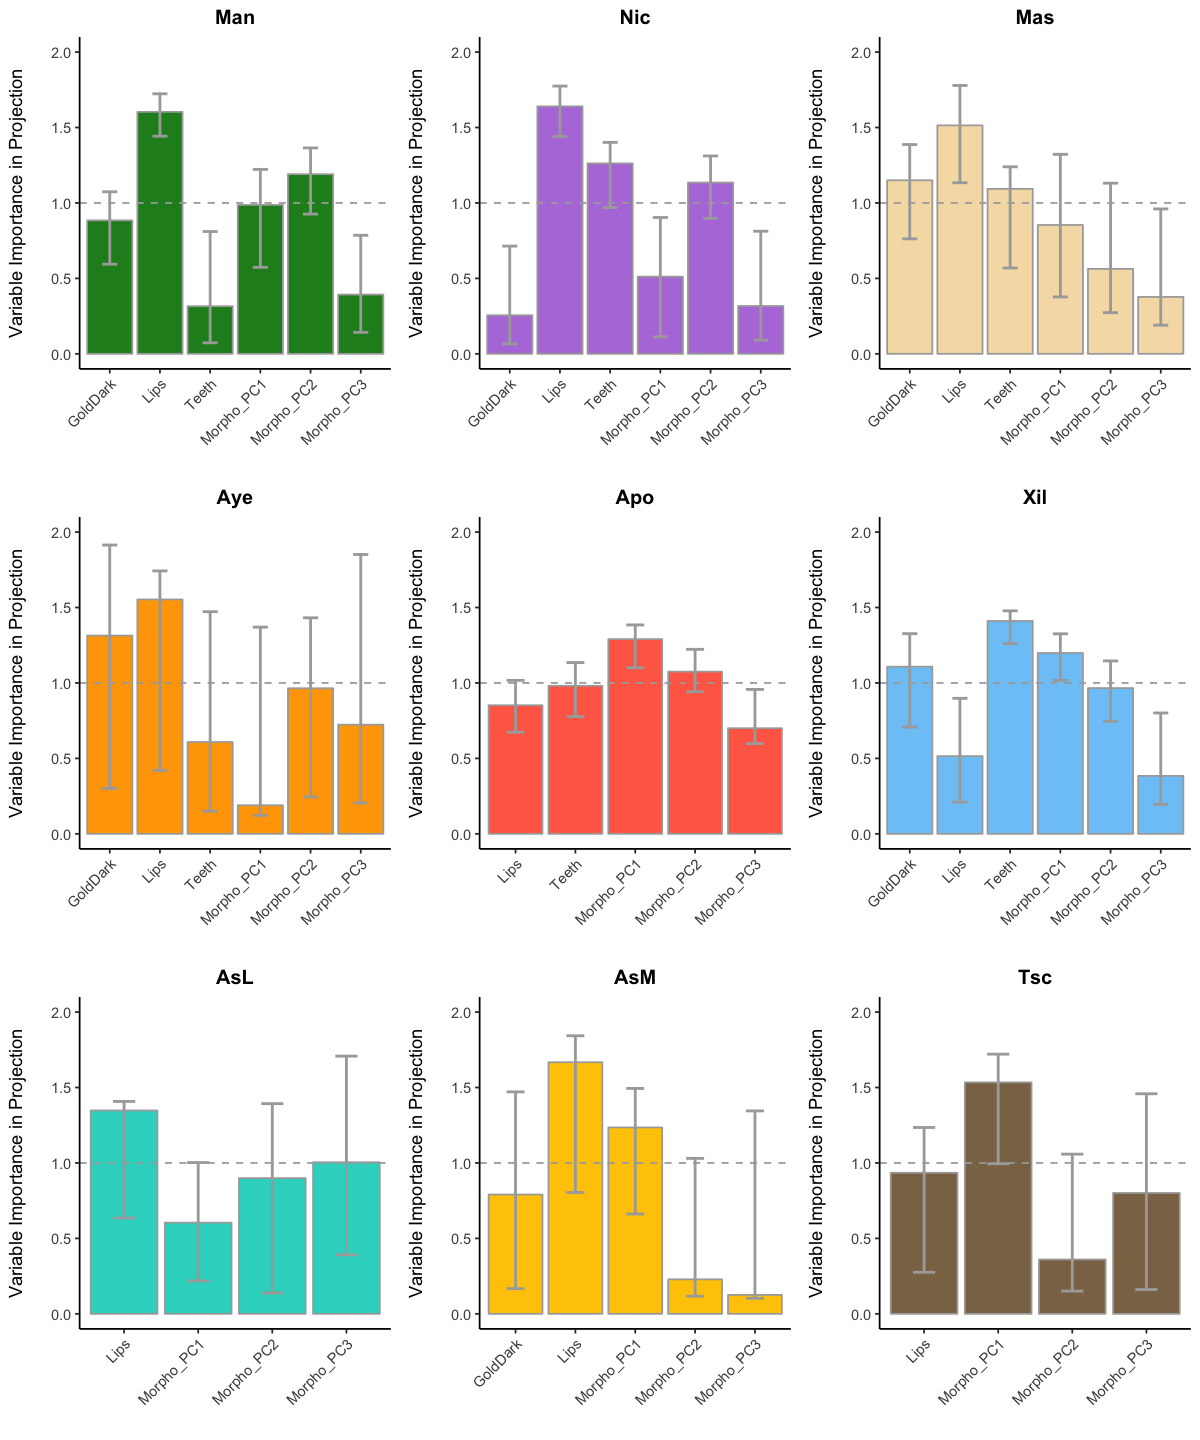

In [62]:
options(repr.plot.height=12, repr.plot.width=10)

# this will throw a few warning messages, but that's okay (due to traits that have been removed for certain lakes (e.g. no gold morphs in Apoyo and Tiscapa))
VIPs <- plot_grid(plotlist=p, ncol=3)
VIPs

file_name="out_PLS.MoM.VIPs.1000BSreps.95quantile.pdf"
if(!file.exists(file_name)) {
    save_plot(file_name, VIPs, ncol=3, nrow=3, base_width=4, base_height=4)
}

In [67]:
# write summary to file
out_file = "out_PLS.MoM.VIPs.1000BSreps.prop.above.one.tsv"
if(!file.exists(out_file)) {
    do.call(rbind, VIP.all) %>% rownames_to_column("Lake") %>% mutate(Lake=str_replace(Lake,".[0-9]","")) %>%
        write_tsv(out_file)
}

In [66]:
# write summary in a slightly nicer way
out_file = "pls.csv"
if(!file.exists(out_file)) {
    do.call(rbind, VIP.all) %>% rownames_to_column("Lake") %>% mutate(Lake=str_replace(Lake,".[0-9]","")) %>%
    mutate(Lake=case_when(Lake=="Man" ~ "GL Managua",Lake=="Nic" ~ "GL Nicaragua",Lake=="Apo" ~ "CL Apoyo",
                         Lake=="Xil" ~ "CL Xiloá",Lake=="Mas" ~ "CL Masaya",Lake=="Aye" ~ "CL Apoyeque",
                         Lake=="AsM" ~ "CL As. Managua",Lake=="AsL" ~ "CL As. León",Lake=="Tsc" ~ "CL Tiscapa"))  %>%
    select(Lake,"Trait"=trait,"VIP_estimate"=estimate,"VIP_lower_bound_95CI"=lo.CI,"VIP_upper_bound_95CI"=hi.CI) %>%
    write_csv(out_file)
}